# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [19]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  39036      0 --:--:-- --:--:-- --:--:-- 39077']

In [20]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [23]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    sum = 0
    for a, b in zip(array1, array2):
        sum += a * b
    return sum


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1/(1+math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):

    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):

    if output(weights, instance)>=0.5:
        return 1
    else:
        return 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: total number of  weights is equal to number of values in each instance removing label and assiagning weights  to zero
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            '''TODO: each perceptron dot product the weights and instance values and use the
             sigmoid activation function on dot product value  and subtract from the  label to find error '''
            in_value = dot_product(weights, instance)
           # send the value to sigmoid
            output = sigmoid(in_value)
            #calculating error using the output from sigmoid
            error = instance[-1] - output
            #TODO: updating the weigths based on the error
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [24]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

while if we use predict it truns the raw output into a binary value (0 or 1), but the training needs the raw output to compute the error and update weights using gradient descent.
so we dont use the code with predict function



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [25]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    OU=[]
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      OU.append(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
    print(*OU, sep='\n')



#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learning rate: 

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



3A) No , i dont need to train with all the dataset to get highest acuracy.
we can see the high accuarcy in the above example With a learning rate of 0.01, training on 300 instances (75% of the dataset) and 100 epochs yields an accuracy of 80.0% which is same with full dataset. we can see in the plot below.


3B) we see low accuracy in the second run becuase of low learning rate and less epochs, with lower learning rate (0.005 vs. 0.050), means the model updates its weights more slowly, and result in slower convergence and suboptimal performance, with fewer epochs.  With only 20 epochs, the model may not have had enough iterations to fully learn from the larger dataset, especially with a small learning rate

3C) Yes, I can achieve higher accuracy (above 80.0) by introducing additional hyperparameters like regularization (to prevent overfitting), momentum (to speed up convergence), adaptive learning rates (e.g., Adam optimizer) and Early stopping.

3D) No, training for more epochs is not always beneficial. While increasing epochs can improve accuracy up to a certain point, it can also lead to overfitting

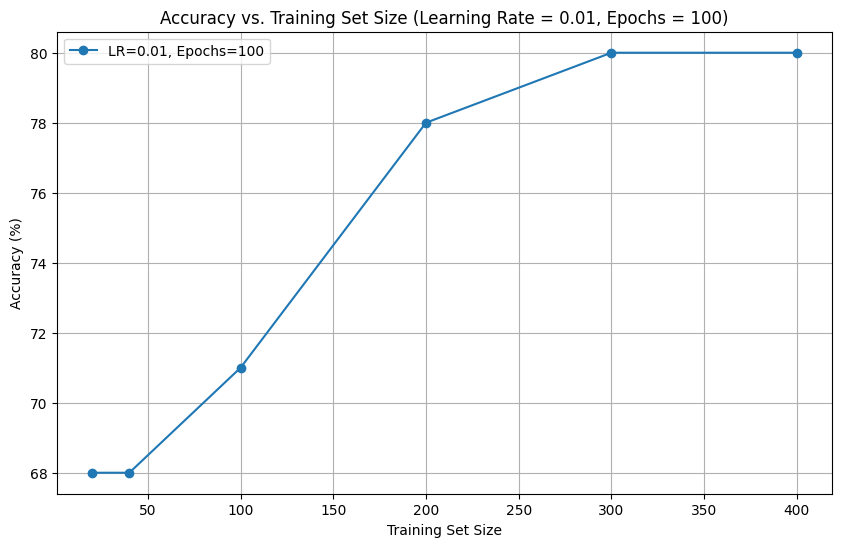

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual results)
training_sizes = [20, 40, 100, 200, 300, 400]
learning_rates = [0.005, 0.01, 0.05]
epochs_list = [5, 10, 20, 50, 100]

# Accuracy data for learning rate = 0.01 and epochs = 100
accuracy_lr_0_01_epochs_100 = [68.0, 68.0, 71.0, 78.0, 80.0, 80.0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, accuracy_lr_0_01_epochs_100, marker='o', label='LR=0.01, Epochs=100')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training Set Size (Learning Rate = 0.01, Epochs = 100)')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
#tried to add hyperparameter
import math
import re

# Corpus reader
def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    f.readline()  # Discard header
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        instance = [-1] + instance  # Add dummy input for bias
        data.append(instance)
    return data

def dot_product(array1, array2):
    return sum(x*y for x,y in zip(array1, array2))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def output(weight, instance):
    return sigmoid(dot_product(weight, instance))

def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0

def get_accuracy(weights, instances):
    correct = sum(1 for instance in instances
                if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances)

# Modified training function with learning rate decay
def train_perceptron(instances, lr, epochs, decay=0.95):  # Added decay parameter
    weights1 = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights1, instance)
            out = sigmoid(in_value)
            error = instance[-1] - out
            for i in range(len(weights1)):
                weights1[i] += lr * error * out * (1-out) * instance[i]

        # Apply learning rate decay after each epoch
        lr *= decay

    return weights1

# Example usage
if __name__ == "__main__":
    # Load data
    train_data = read_data("train.dat")
    test_data = read_data("test.dat")

    # Train with learning rate decay
    final_weights = train_perceptron(
        instances=train_data,
        lr=1.19999,        # Initial learning rate
        epochs=50,     # Number of training passes
        decay=0.95     # Decay rate (new hyperparameter)
    )

    # Evaluate
    print(f"Train accuracy: {get_accuracy(final_weights, train_data):.1f}%")
    print(f"Test accuracy: {get_accuracy(final_weights, test_data):.1f}%")

Train accuracy: 83.5%
Test accuracy: 71.4%
